In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv("Hotel Reservations.csv")


In [3]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [7]:
data.shape

(36275, 19)

In [8]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.drop(columns="Booking_ID",inplace=True)

In [11]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


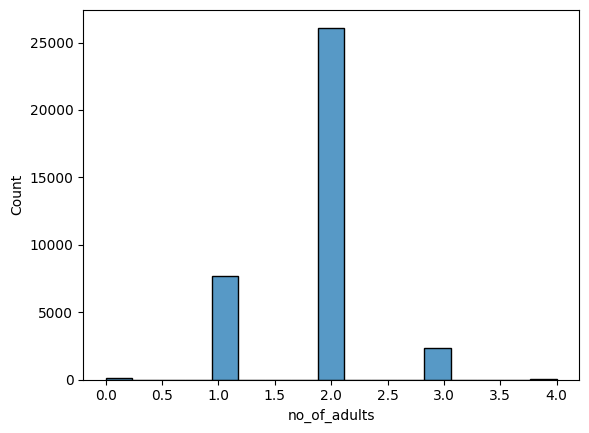

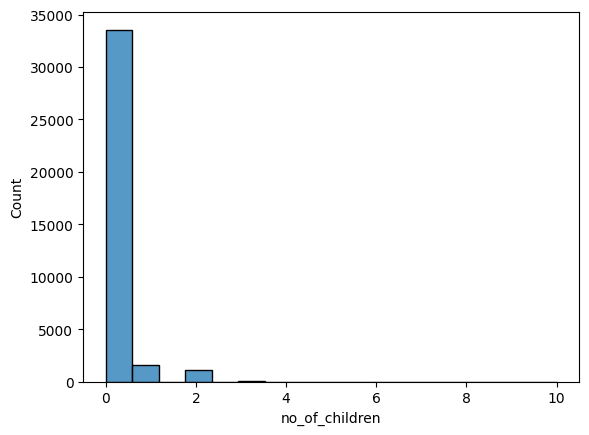

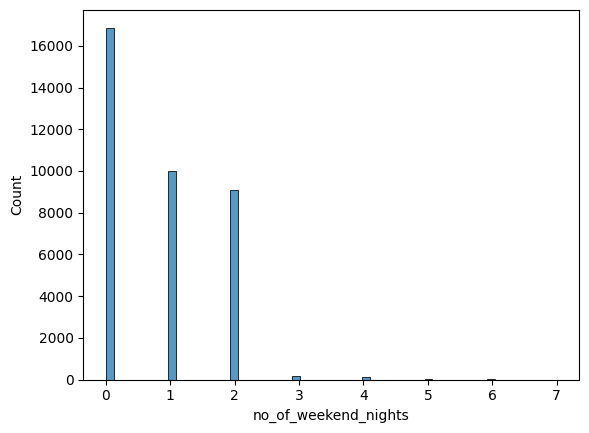

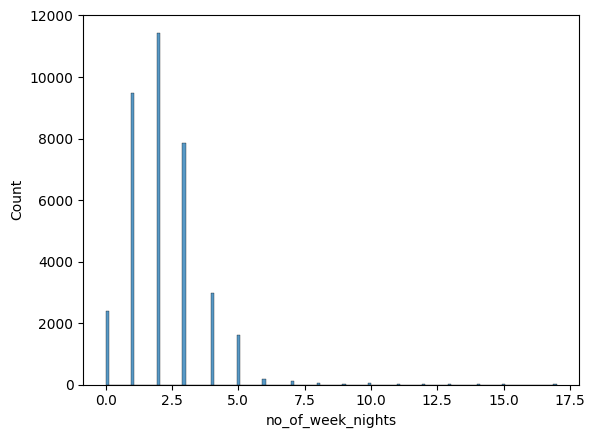

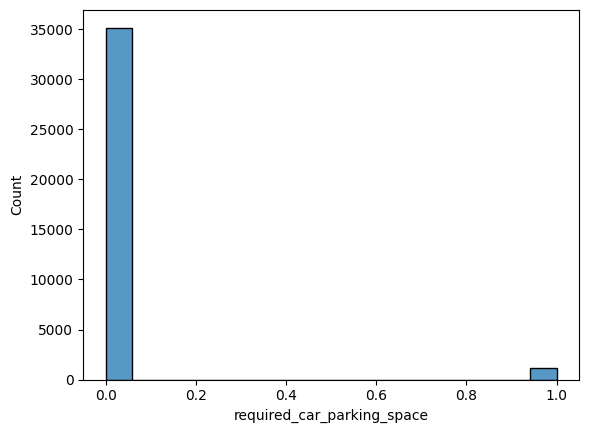

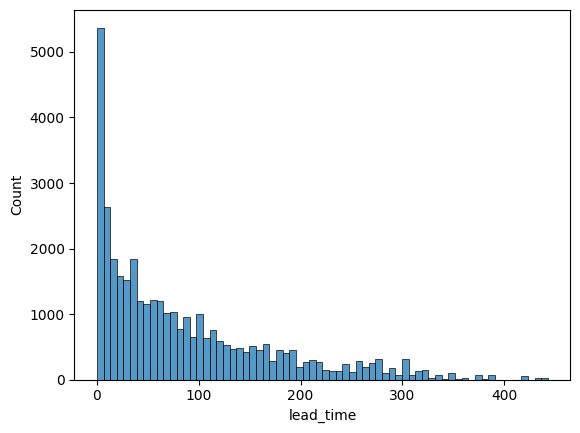

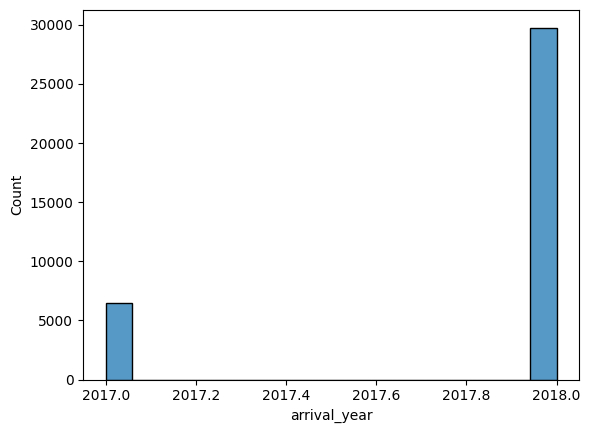

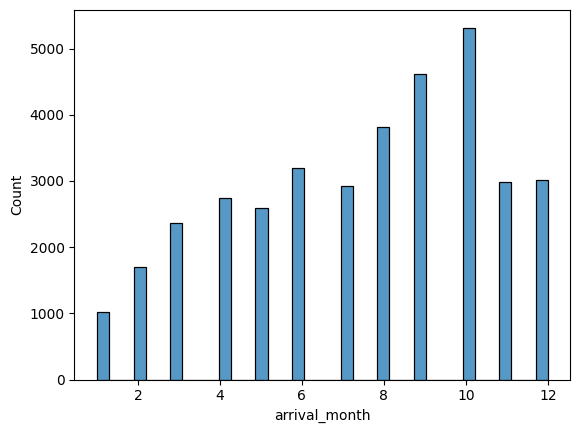

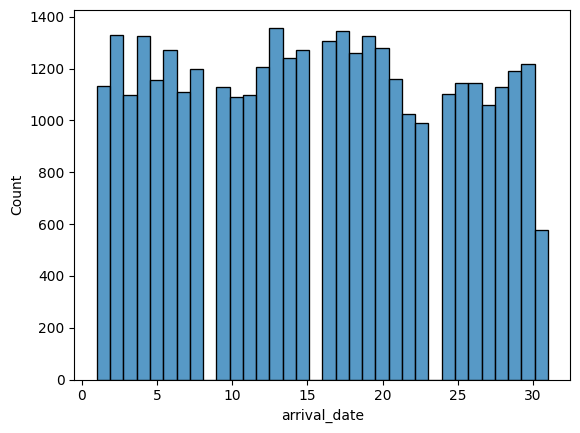

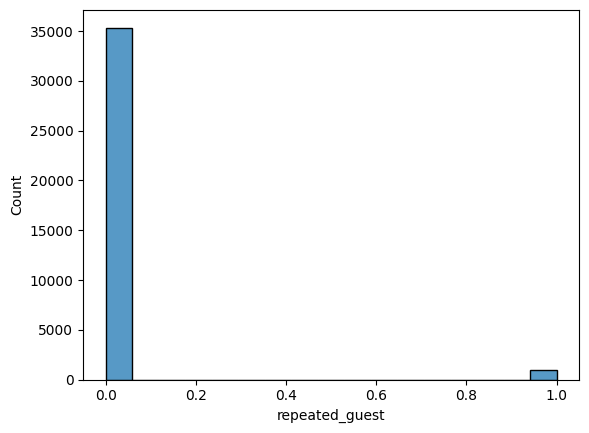

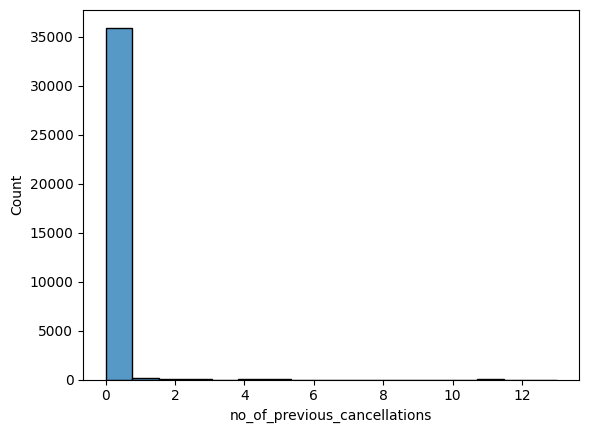

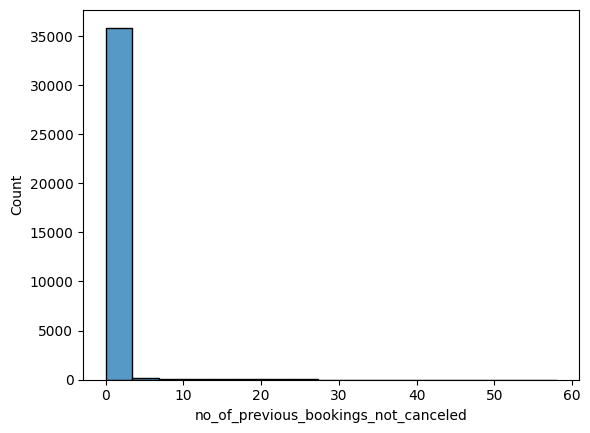

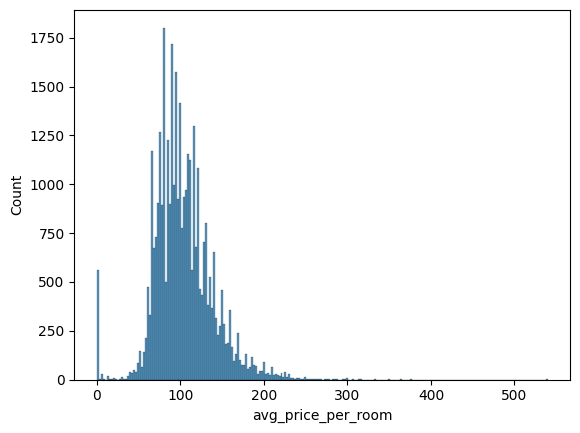

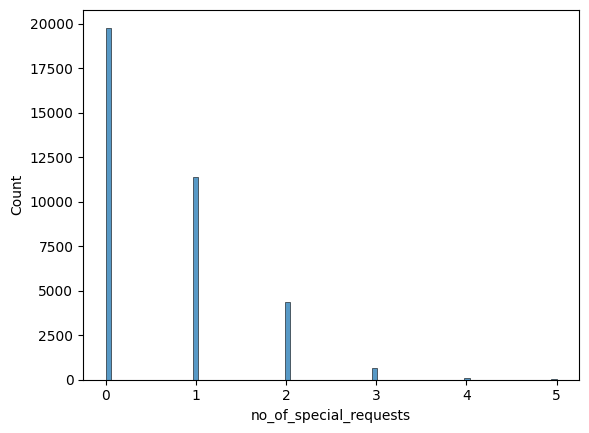

In [12]:
for i in  data.columns:
    if data[i].dtype!="object":
        sns.histplot(x=data[i])
        plt.show()

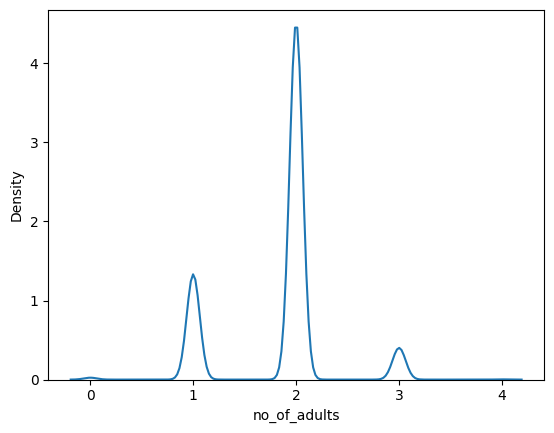

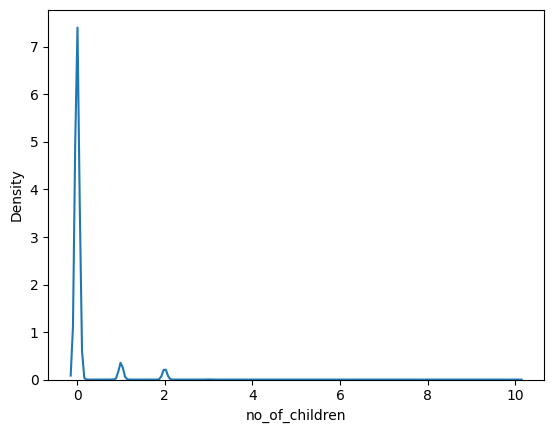

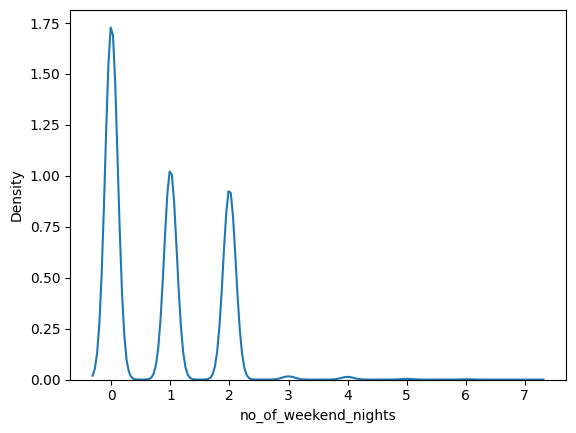

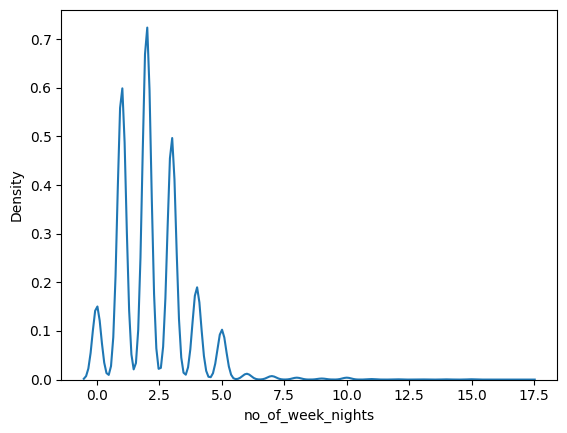

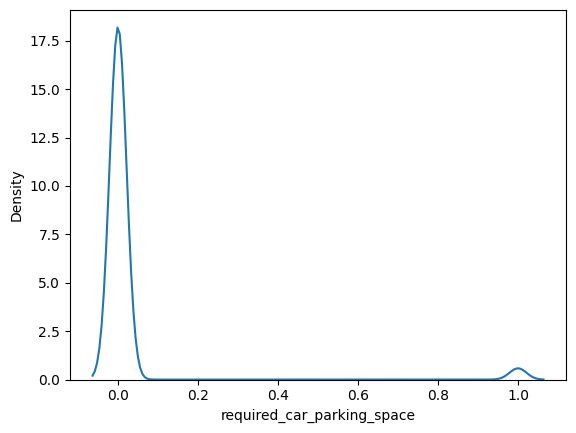

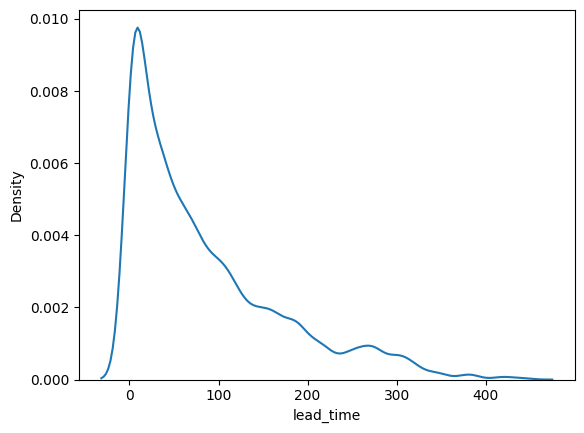

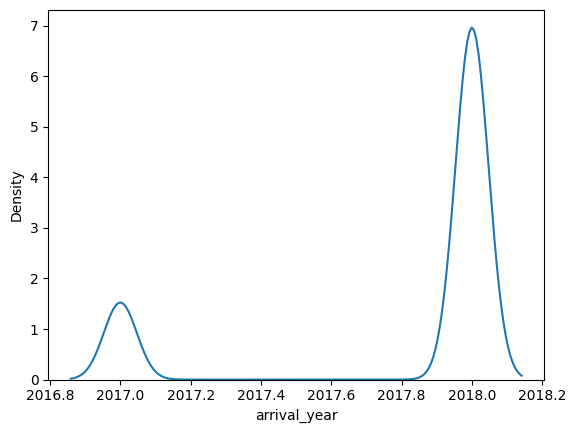

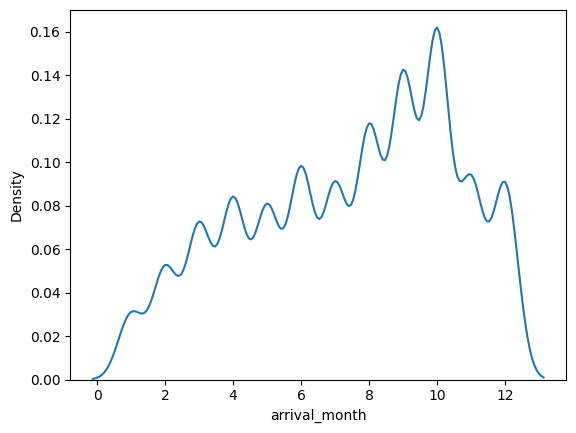

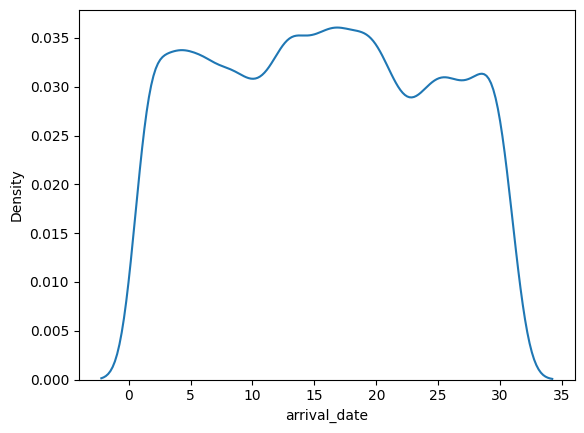

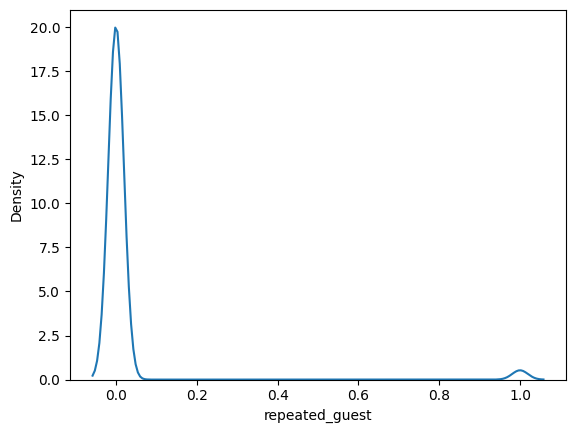

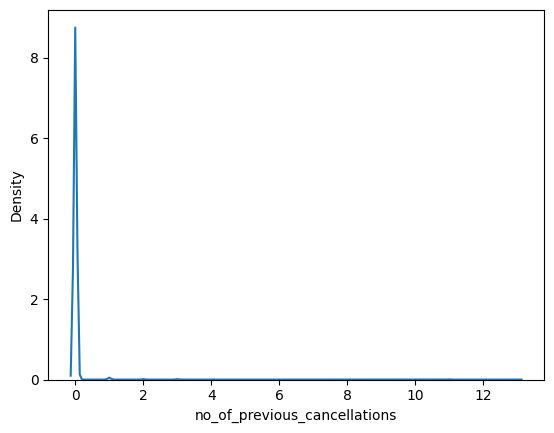

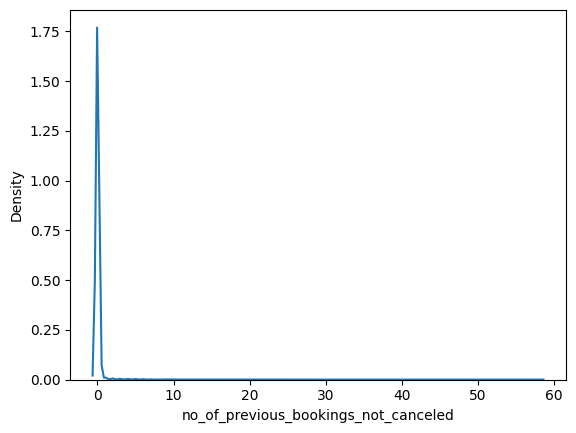

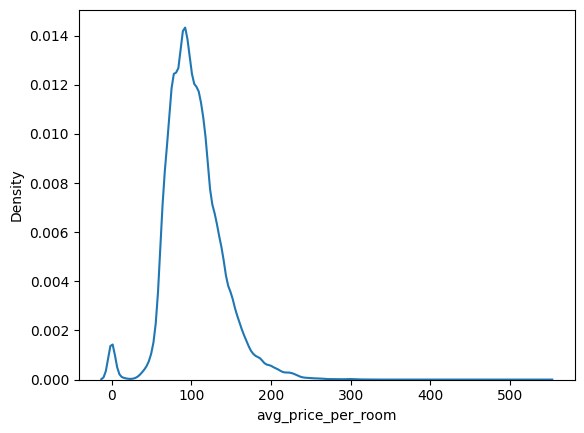

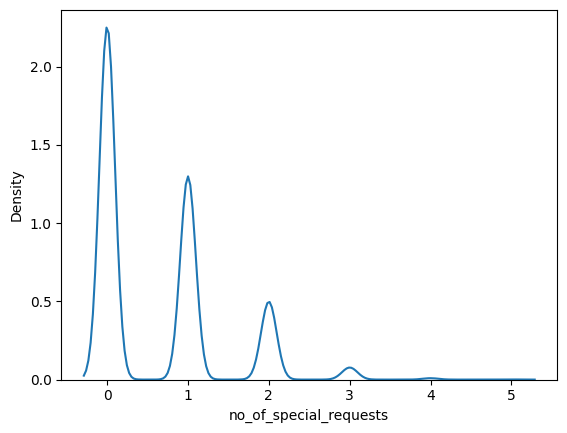

In [13]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.kdeplot(x=data[i])
        plt.show()

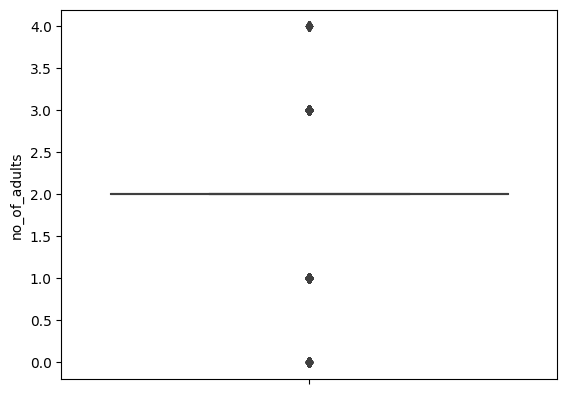

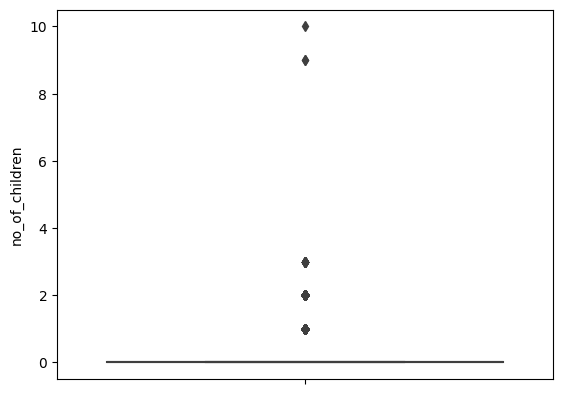

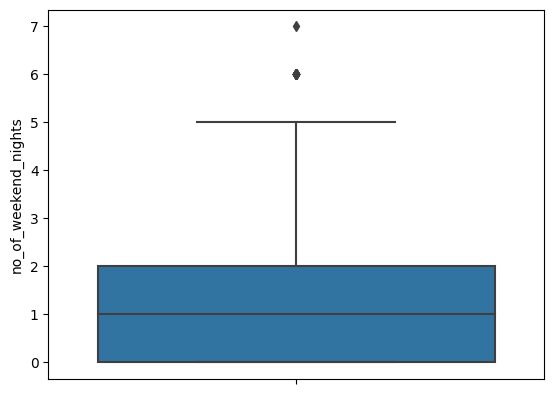

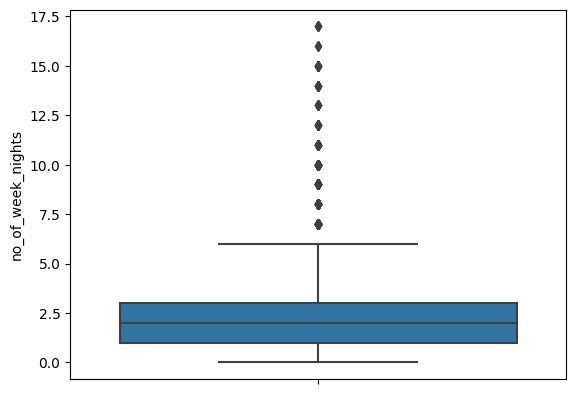

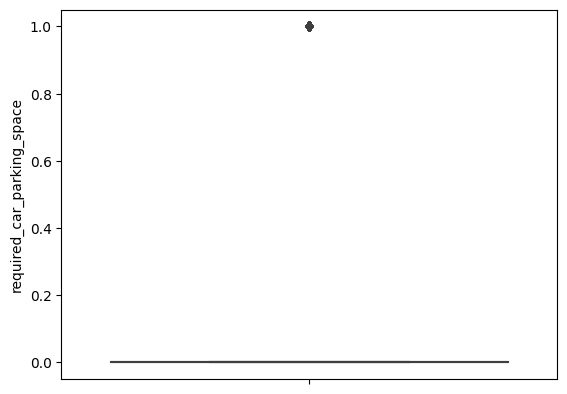

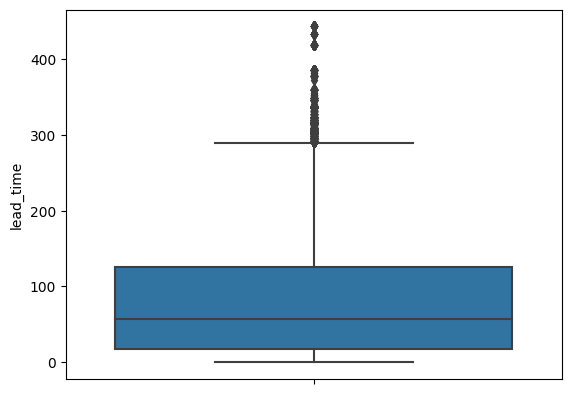

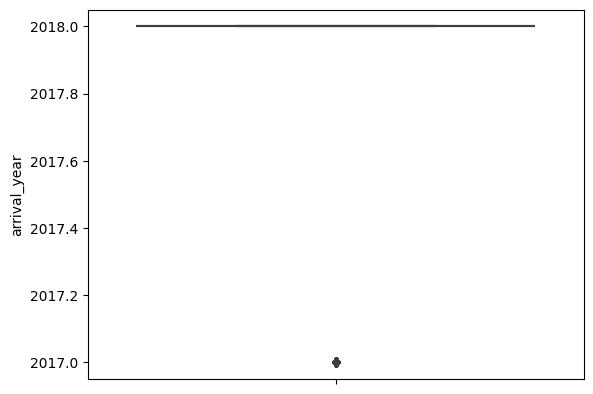

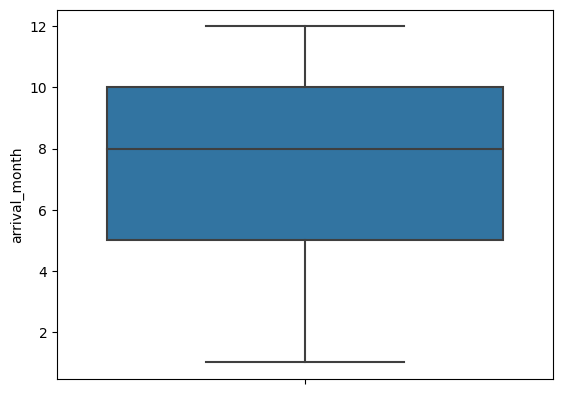

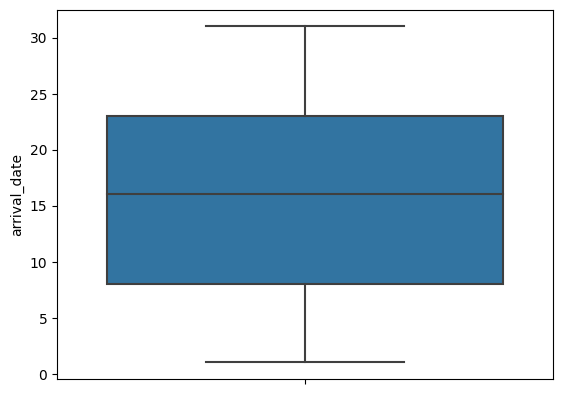

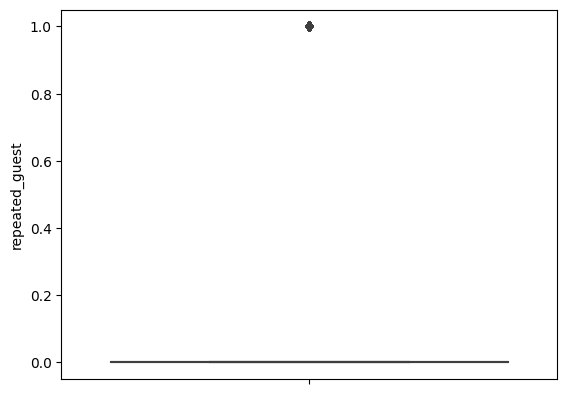

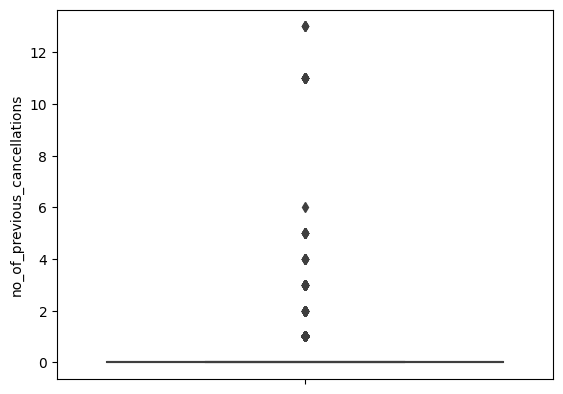

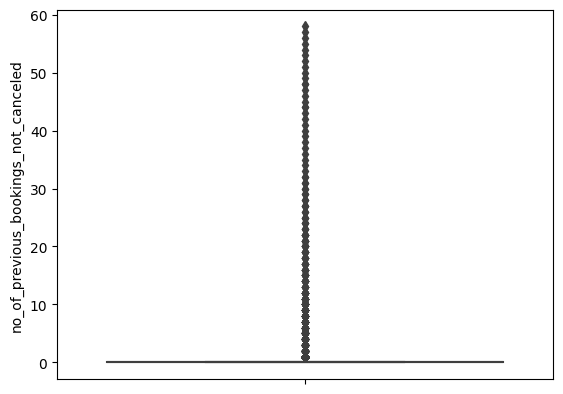

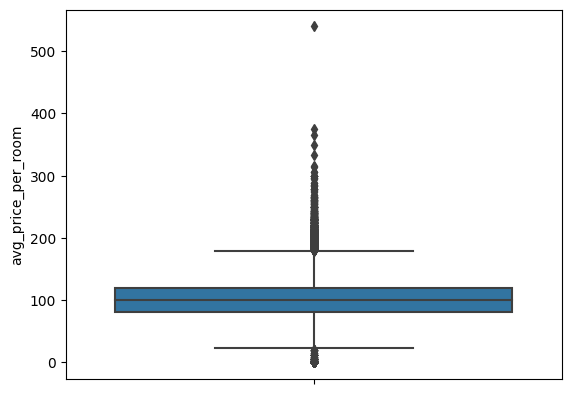

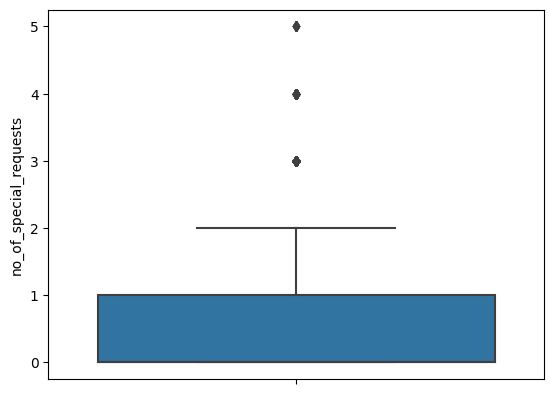

In [14]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i])
        plt.show()
        

In [15]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [16]:
for column in data.columns:
    if data[column].dtype!='object':
        UL,LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])

In [17]:
data.dropna (inplace=True)

In [18]:
data


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
3,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
7,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 4,83.0,2018.0,12.0,26.0,Online,0.0,0.0,0.0,105.61,1.0,Not_Canceled
12,2.0,0.0,2.0,1.0,Not Selected,0.0,Room_Type 1,30.0,2018.0,11.0,26.0,Online,0.0,0.0,0.0,88.00,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36267,2.0,0.0,1.0,0.0,Not Selected,0.0,Room_Type 1,49.0,2018.0,7.0,11.0,Online,0.0,0.0,0.0,93.15,0.0,Canceled
36271,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


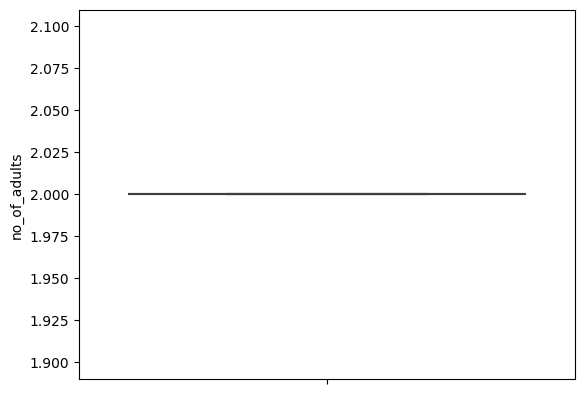

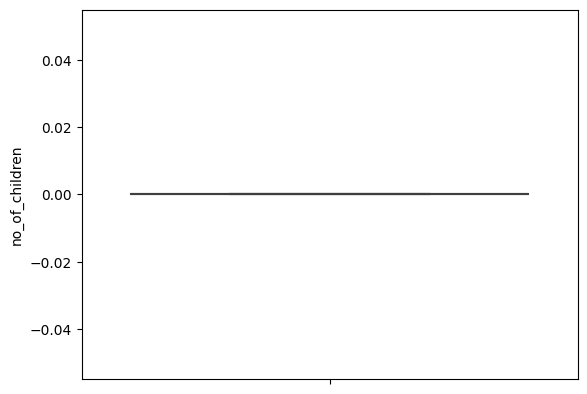

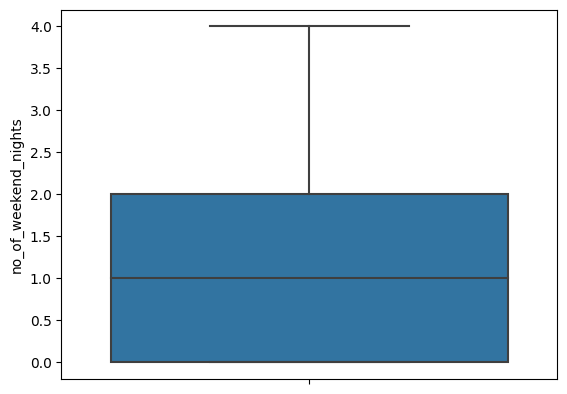

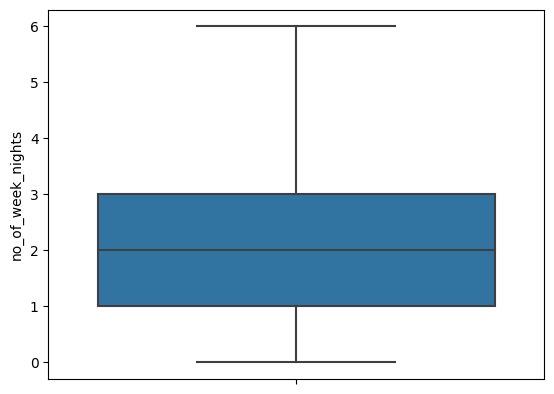

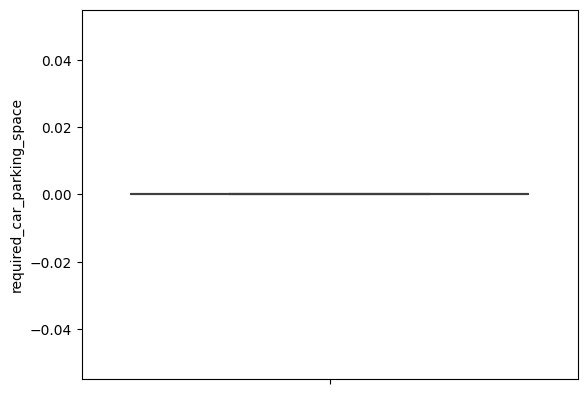

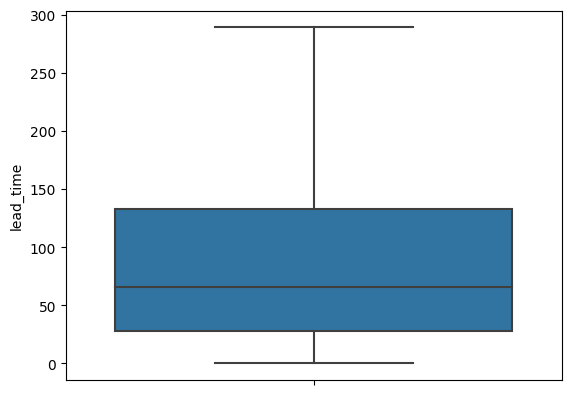

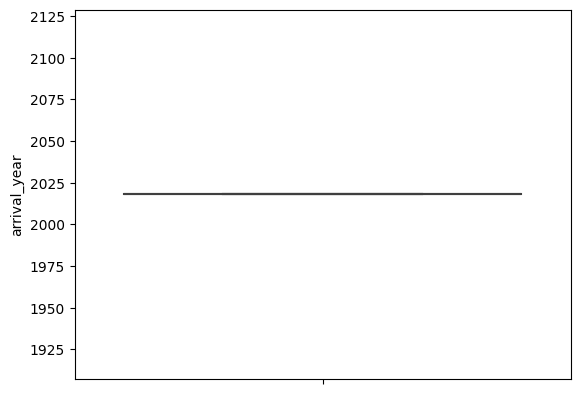

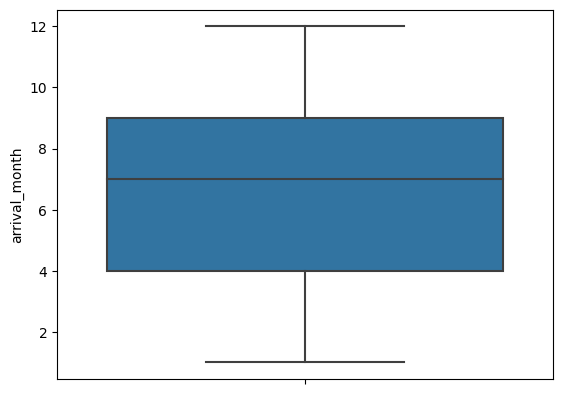

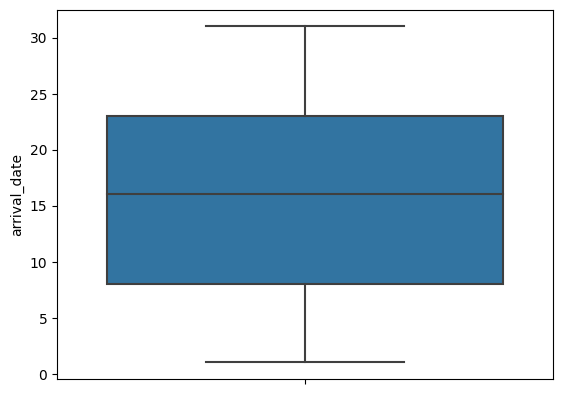

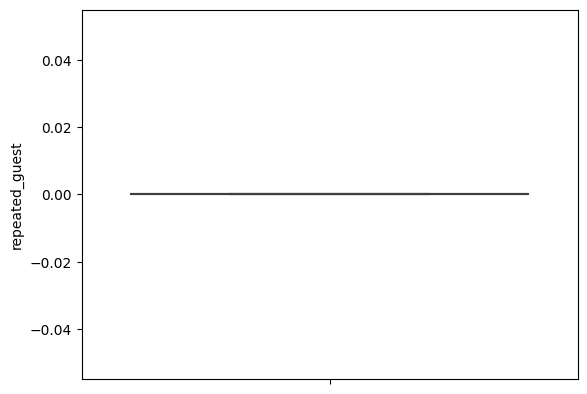

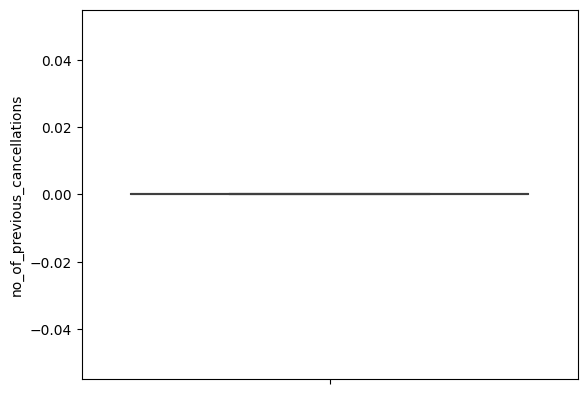

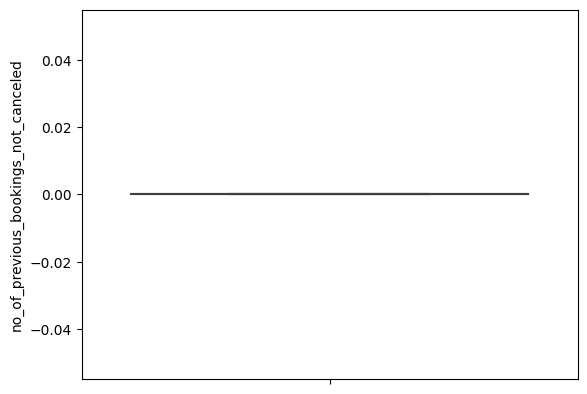

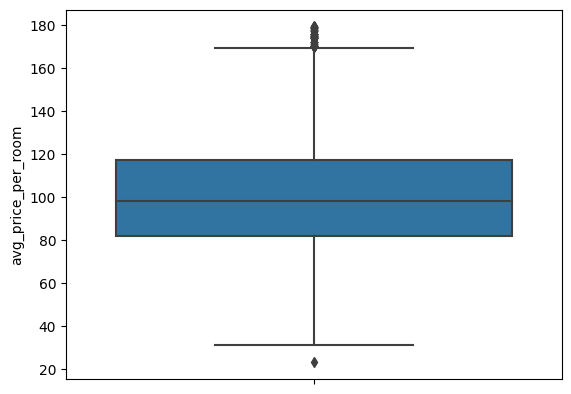

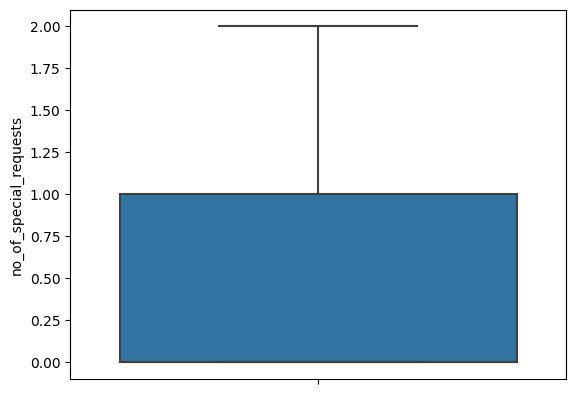

In [19]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i])
        plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16746 entries, 1 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          16746 non-null  float64
 1   no_of_children                        16746 non-null  float64
 2   no_of_weekend_nights                  16746 non-null  float64
 3   no_of_week_nights                     16746 non-null  float64
 4   type_of_meal_plan                     16746 non-null  object 
 5   required_car_parking_space            16746 non-null  float64
 6   room_type_reserved                    16746 non-null  object 
 7   lead_time                             16746 non-null  float64
 8   arrival_year                          16746 non-null  float64
 9   arrival_month                         16746 non-null  float64
 10  arrival_date                          16746 non-null  float64
 11  market_segment_

In [21]:
columns=["type_of_meal_plan","room_type_reserved","market_segment_type","booking_status"]

le=LabelEncoder()
data[columns]=data[columns].apply(le.fit_transform)

In [22]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,2.0,0.0,2.0,3.0,2,0.0,0,5.0,2018.0,11.0,6.0,4,0.0,0.0,0.0,106.68,1.0,1
3,2.0,0.0,0.0,2.0,0,0.0,0,211.0,2018.0,5.0,20.0,4,0.0,0.0,0.0,100.00,0.0,0
4,2.0,0.0,1.0,1.0,2,0.0,0,48.0,2018.0,4.0,11.0,4,0.0,0.0,0.0,94.50,0.0,0
7,2.0,0.0,1.0,3.0,0,0.0,3,83.0,2018.0,12.0,26.0,4,0.0,0.0,0.0,105.61,1.0,1
12,2.0,0.0,2.0,1.0,2,0.0,0,30.0,2018.0,11.0,26.0,4,0.0,0.0,0.0,88.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36267,2.0,0.0,1.0,0.0,2,0.0,0,49.0,2018.0,7.0,11.0,4,0.0,0.0,0.0,93.15,0.0,0
36271,2.0,0.0,1.0,3.0,0,0.0,0,228.0,2018.0,10.0,17.0,4,0.0,0.0,0.0,90.95,2.0,0
36272,2.0,0.0,2.0,6.0,0,0.0,0,148.0,2018.0,7.0,1.0,4,0.0,0.0,0.0,98.39,2.0,1
36273,2.0,0.0,0.0,3.0,2,0.0,0,63.0,2018.0,4.0,21.0,4,0.0,0.0,0.0,94.50,0.0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16746 entries, 1 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          16746 non-null  float64
 1   no_of_children                        16746 non-null  float64
 2   no_of_weekend_nights                  16746 non-null  float64
 3   no_of_week_nights                     16746 non-null  float64
 4   type_of_meal_plan                     16746 non-null  int32  
 5   required_car_parking_space            16746 non-null  float64
 6   room_type_reserved                    16746 non-null  int32  
 7   lead_time                             16746 non-null  float64
 8   arrival_year                          16746 non-null  float64
 9   arrival_month                         16746 non-null  float64
 10  arrival_date                          16746 non-null  float64
 11  market_segment_

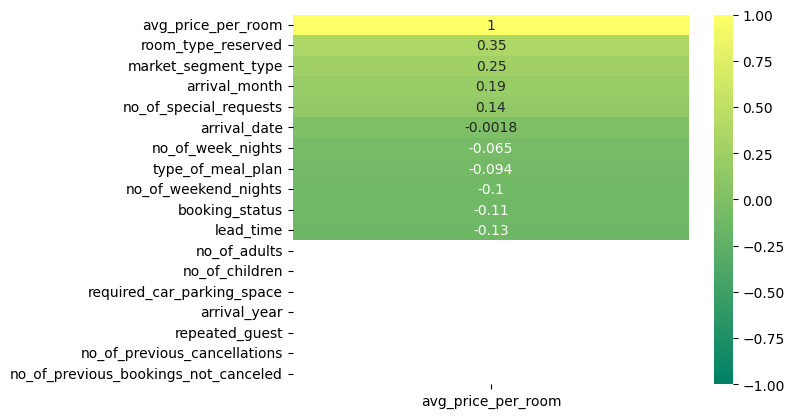

In [24]:
sns.heatmap(data.corr()[["avg_price_per_room"]].sort_values(by="avg_price_per_room", ascending=False), vmin=-1, vmax=1, annot=True,cmap="summer");

In [25]:
x=data[['room_type_reserved','market_segment_type','arrival_month','no_of_special_requests']].values

In [26]:
y=data[['avg_price_per_room']].values

In [27]:
rs=RobustScaler()

In [28]:
x=rs.fit_transform(x)

In [29]:
x

array([[ 0. ,  0. ,  0.8,  1. ],
       [ 0. ,  0. , -0.4,  0. ],
       [ 0. ,  0. , -0.6,  0. ],
       ...,
       [ 0. ,  0. ,  0. ,  2. ],
       [ 0. ,  0. , -0.6,  0. ],
       [ 0. , -1. ,  1. ,  0. ]])

In [30]:
model = RandomForestRegressor()

In [31]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "LinearSVR":LinearSVR(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor()
}

In [34]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  22.233087049978142
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  22.23308588503959
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  19.05668034664374
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  22.472129944578562
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  21.12322521113885
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  19.027305305020402
*************************************************

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
model= RandomForestRegressor()

In [37]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
y_pred = model.predict(x)

In [43]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTION"),dtype=float)

In [44]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,106.68,94.086513
1,100.00,108.169365
2,94.50,94.094968
3,105.61,113.194995
4,88.00,87.717939


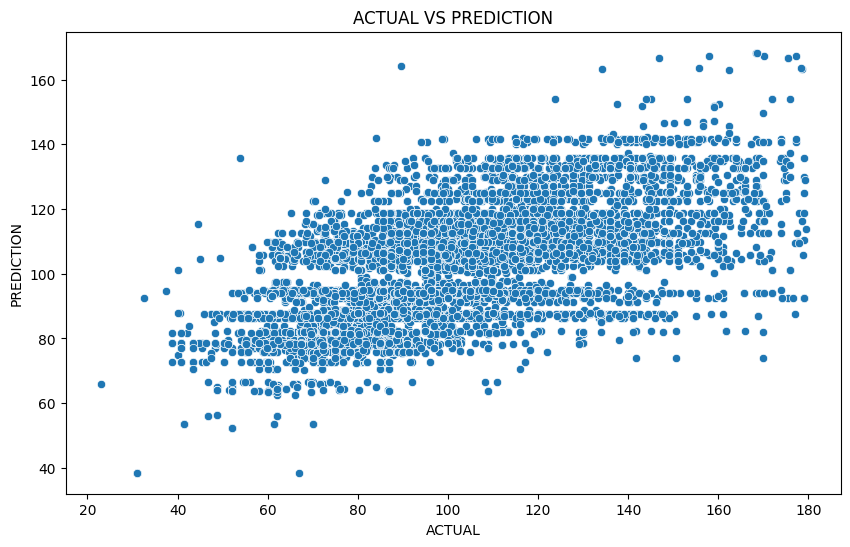

In [45]:
plt.figure(figsize=(10,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");